# data1.5.csv的1950-1998年北京市城鄉居民定期儲蓄所占比例序列。

<br>對data1.5.csv中的1950-1998年北京市城鄉居民定期儲蓄所占比例序列，進行平穩性與純隨機性進行檢驗。（利用statsmodels的函數）<br/>
<br>畫出時序圖<br/>
<br>進行自相關圖檢驗<br/>
<br>進行純隨機性檢驗（延遲6期和12期，𝑎𝑙𝑝ℎ𝑎=0.05）<br/>
<br>用文字描述你的結果。<br/>


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
import statsmodels.tsa.api as smt

# statsmodels自帶的畫ACF的函數

In [2]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

# statsmodels自帶的LB test

In [3]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

# 自己寫的LB test

In [4]:
def mypurerandtest(y,lag):
    myacf=np.ones(lag+1)  
    n= len(y) #n为序列观察期数
    u = y.mean() #用u表示μ
    for k in range(0,lag+1):
        Molecular = 0   #分子
        denominator = 0 #分母
        for i in range(0,n-k):
            Molecular += (y[i] - u)*(y[i+k] - u)
        for i in range(0,n):
            denominator += (y[i] - u)**2
        myacf[k] = Molecular/denominator
    m = len(myacf)
    #m为指定延期期数
    LB=np.zeros(len(myacf))
    Lag=range(1,lag+1)
    for i in range(1, m):
        for j in range(1, i + 1):
            LB[i] += n * (n + 2) * (myacf[j]**2 / (n - j))
    realLB = LB[1:]
    myd=pd.DataFrame(np.c_[Lag,realLB],columns=['lags','LB'])
    myd['lags'] = myd['lags'].astype(np.int64)
    print(myd)

# 自己寫的畫圖函數

In [26]:
def mydrawts(y):
    myname='XIE_HAOMING'
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots(custom %s)'%myname)
    
    ##calclate acf    
    myacf=np.ones(13)  
    n= len(y) #n为序列观察期数
    u = y.mean() #用u表示μ
    for k in range(0,13):
        Molecular = 0   #分子
        denominator = 0 #分母
        for i in range(0,n-k):
            Molecular += (y[i] - u)*(y[i+k] - u)
        for i in range(0,n):
            denominator += (y[i] - u)**2
        myacf[k] = Molecular/denominator

    twosigma=np.ones(len(myacf))
    num2= len(y)
    twosigma[0] = (1/num2) **2
    for i in range(1,len(myacf)):
        sum = 0
        for j in range(0,i):
            sum +=myacf[j] **2
        twosigma[i] = ((1/num2)*(1+2*sum ))**0.5
    
    acf_ax.bar(range(len(myacf)),myacf)
    acf_ax.fill_between(range(len(myacf)),-1*twosigma,twosigma,color='lightblue')

    plt.show()
    plt.close()

# 運行

statsmodels ACF


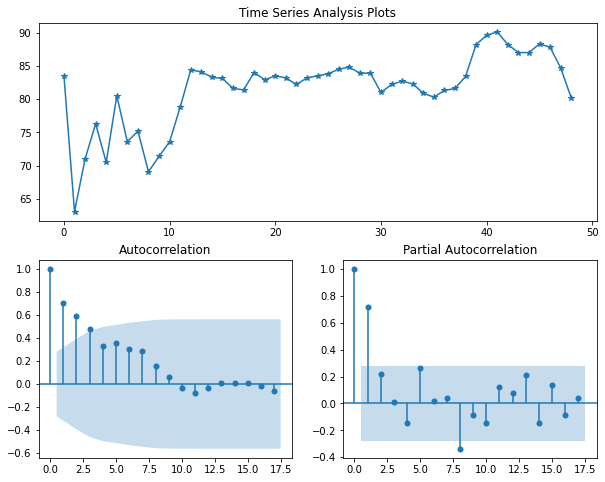

myACF


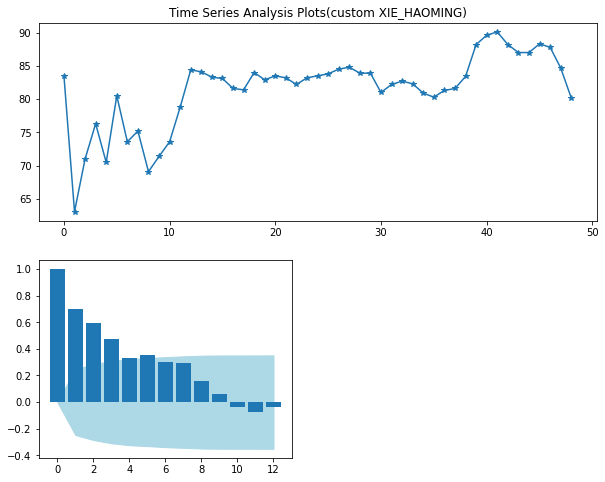

statsmodels LB test
----time series: LB pure randomness test----
           LB        Pvalue  lags
0   25.690150  4.008680e-07     1
1   44.538189  2.131352e-10     2
2   56.946610  2.638211e-12     3
3   62.923742  7.041359e-13     4
4   70.113128  9.707158e-14     5
5   75.458366  3.088589e-14     6
6   80.501223  1.088588e-14     7
7   82.068855  1.872350e-14     8
8   82.293419  5.653711e-14     9
9   82.383407  1.709528e-13    10
10  82.774464  4.279879e-13    11
11  82.865857  1.168870e-12    12
12  82.869811  3.172897e-12    13
13  82.872909  8.266564e-12    14
14  82.882331  2.067449e-11    15
15  82.909823  4.953289e-11    16
16  83.158479  1.048373e-10    17
17  83.284177  2.267782e-10    18
18  83.486411  4.627015e-10    19
19  83.582138  9.600952e-10    20
20  83.644173  1.968648e-09    21
21  83.816749  3.776825e-09    22
statsmodels LB test


D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [27]:
##read data
dfname='data1.5'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
print('statsmodels ACF')
drawts(y,dfname)
print('myACF')
mydrawts(y)
print('statsmodels LB test')
purerandtest(y)
print('statsmodels LB test')

In [6]:
print('statsmodels LB test')
purerandtest(y)

statsmodels LB test
----time series: LB pure randomness test----
           LB        Pvalue  lags
0   25.690150  4.008680e-07     1
1   44.538189  2.131352e-10     2
2   56.946610  2.638211e-12     3
3   62.923742  7.041359e-13     4
4   70.113128  9.707158e-14     5
5   75.458366  3.088589e-14     6
6   80.501223  1.088588e-14     7
7   82.068855  1.872350e-14     8
8   82.293419  5.653711e-14     9
9   82.383407  1.709528e-13    10
10  82.774464  4.279879e-13    11
11  82.865857  1.168870e-12    12
12  82.869811  3.172897e-12    13
13  82.872909  8.266564e-12    14
14  82.882331  2.067449e-11    15
15  82.909823  4.953289e-11    16
16  83.158479  1.048373e-10    17
17  83.284177  2.267782e-10    18
18  83.486411  4.627015e-10    19
19  83.582138  9.600952e-10    20
20  83.644173  1.968648e-09    21
21  83.816749  3.776825e-09    22


D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [25]:
print('my LBtest')
mypurerandtest(y,12)

my LBtest
    lags         LB
0      1  25.690150
1      2  44.538189
2      3  56.946610
3      4  62.923742
4      5  70.113128
5      6  75.458366
6      7  80.501223
7      8  82.068855
8      9  82.293419
9     10  82.383407
10    11  82.774464
11    12  82.865857
